In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 58.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 50.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 49.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [2]:
!pip install opencv-python

In [3]:
!pip install matplotlib

In [4]:
!pip install pandas

In [5]:
!pip install easyocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.8/422.8 kB 25.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 969.6/969.6 kB 41.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.9/292.9 kB 21.9 MB/s eta 0:00:00


In [6]:
# Importing the Dependencies:-

from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt


In [7]:
# Loading the yolo model:-
model = YOLO('/content/best (1).pt')


0: 192x320 1 license_plate, 63.7ms
Speed: 5.4ms preprocess, 63.7ms inference, 1.9ms postprocess per image at shape (1, 3, 192, 320)


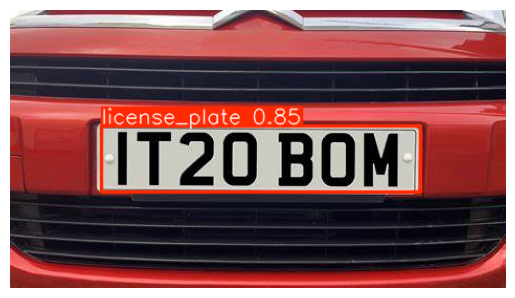

In [36]:
# Taking the image and importing for the processing:-

image = '/content/CAR2.jpg'

# Read the image:-
Img = cv2.imread(image)

# Taking the Color code (RGB):-
image_rgb = cv2.cvtColor(Img, cv2.COLOR_BGR2RGB)

# Run YOLO MODEL:-
results = model(image_rgb)

# Outlining the model:-
results[0].plot()
plt.imshow(results[0].plot())
plt.axis('off')
plt.show()

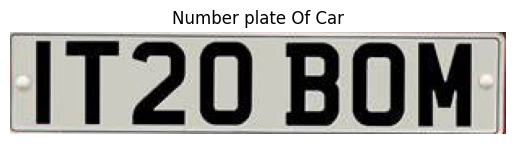

In [39]:
# Taking the Plate into the separate:-

for result in results:
    boxes = result.boxes.xyxy.cpu().numpy().astype(int)  # xyxy format
    for box in boxes:
        x1, y1, x2, y2 = box
        crop_mask = image_rgb[y1:y2, x1:x2]

        # Crpped image:-
        plt.imshow(crop_mask)
        plt.title("Number plate Of Car")
        plt.axis('off')
        plt.show()

In [41]:
import easyocr

# Initialize OCR reader:-
reader = easyocr.Reader(['en'])

# Perform OCR on the cropped plate
OCR_Pic = reader.readtext(crop_mask)

# Display OCR result
for detection in OCR_Pic:
    text = detection[1]
    print("Detected Text:", text)

Detected Text: IT2O BOM


In [42]:
# import cv2

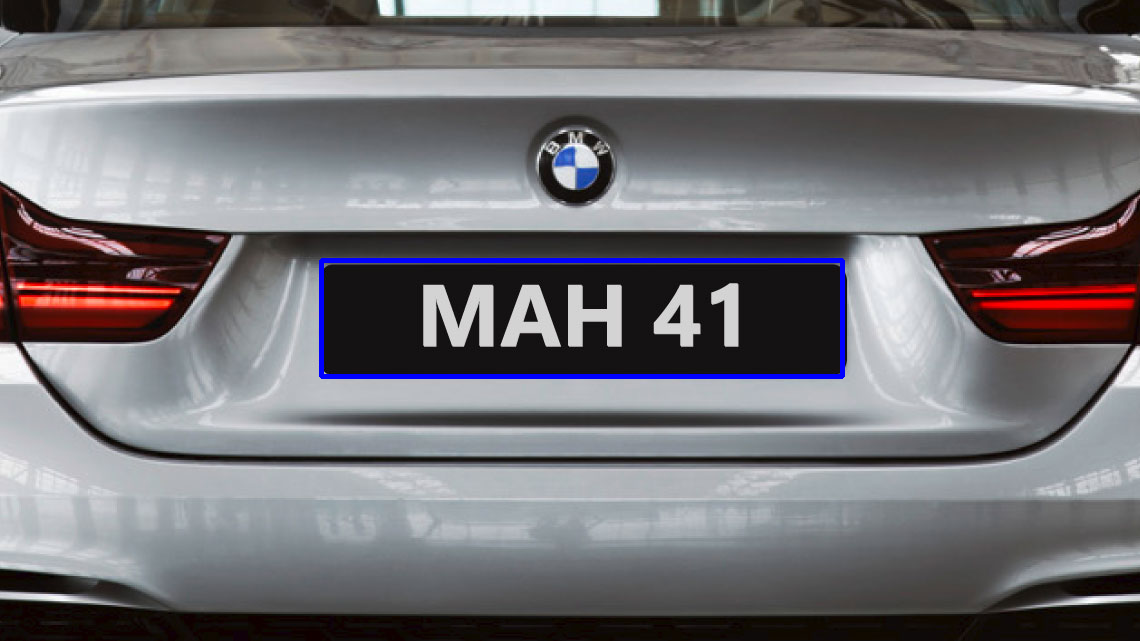

In [77]:
# Read the image:-

img = cv2.imread('/content/CAR3.jpg')

# taking the co-ordinates:-
x1,y1,x2,y2=321,260,842,376

# to make the border for the rectangular plate:-
cv2.rectangle(img,(x1,y1),(x2,y2),color=(255,0,0),thickness=3)

# output:-
cv2_imshow(img)


cv2.waitKey(0)
cv2.destroyAllWindows()

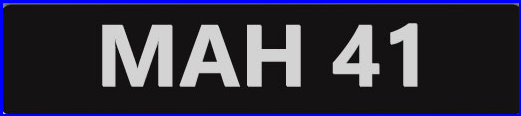

In [76]:
# crop the image to take the number plate:-

crop_img= img[y1:y2, x1:x2]

cv2_imshow(crop_img)

# to save the crop image:-

cv2.imwrite('/content/crop_img.jpg',crop_img)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [78]:
import easyocr

# Initialize OCR reader:-
reader = easyocr.Reader(['en'])

# Perform OCR on the cropped plate
OCR_Pic = reader.readtext(crop_img)

# Display OCR result
for detection in OCR_Pic:
    text = detection[1]
    print("Detected Text:", text)

Detected Text: MAH 41
